In [146]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt 
from scipy.stats import mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
from scipy.stats import shapiro

In [148]:
df = pd.read_csv('events_AB_test.csv')

### 1. Основные характеристики данных

In [151]:
print(df.head())
print(df.tail())

      id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0
          id    group segment  events
99995  60695  control     low    15.0
99996   5934  control     low    16.0
99997  30046  control     low    22.0
99998  26474  control     low    21.0
99999  42649  control     low    23.0


In [153]:
df.columns

Index(['id', 'group', 'segment', 'events'], dtype='object')

In [155]:
df.dtypes

id           int64
group       object
segment     object
events     float64
dtype: object

In [157]:
len(df)

100000

In [159]:
df.describe()

,id,events
count,100000.000000,100000.000000
mean,49999.500000,34.213930
std,28867.657797,17.585193
min,0.000000,4.000000
25%,24999.750000,21.000000
50%,49999.500000,29.000000
75%,74999.250000,40.000000
max,99999.000000,102.000000


In [161]:
df.isnull().sum() # количество пропущенных значений (NaN)

id         0
group      0
segment    0
events     0
dtype: int64

### Описательная статистика: mean, median, sem

In [164]:
# Test
test_group = df[df['group'] == 'test']['events']
test_mean = test_group.mean()
test_median = test_group.median()
se_test = stats.sem(test_group)
print(f'Группа test: среднее = {test_mean:.2f}, медиана = {test_median}, стандартное отклонение (SE) = {se_test:.5f}')

Группа test: среднее = 40.41, медиана = 35.0, стандартное отклонение (SE) = 0.07188


In [166]:
# Control
control_group = df[df['group'] == 'control']['events']
control_mean = control_group.mean()
control_median = control_group.median()
se_control = stats.sem(control_group)
print(f'Группа control: среднее = {control_mean:.2f}, медиана = {control_median}, стандартное отклонение (SE) = {se_control:.5f}')

Группа control: среднее = 28.02, медиана = 21.0, стандартное отклонение (SE) = 0.07529


In [168]:
# High
high = df[df['segment'] == 'high']['events']
high_mean = high.mean()
high_median = high.median()
se_high = stats.sem(high)
print(f'Сегмент high: среднее = {high_mean:.2f}, медиана = {high_median}, стандартное отклонение (SE) = {se_high:.5f}')

Сегмент high: среднее = 64.95, медиана = 65.0, стандартное отклонение (SE) = 0.06731


In [170]:
#Low
low = df[df['segment'] == 'low']['events']
low_mean = low.mean()
low_median = low.median()
se_low = stats.sem(low)
print(f'Сегмент low: среднее = {low_mean:.2f}, медиана = {low_median}, стандартное отклонение (SE) = {se_low:.5f}')

Сегмент low: среднее = 26.53, медиана = 26.0, стандартное отклонение (SE) = 0.02928


### Гистограммы

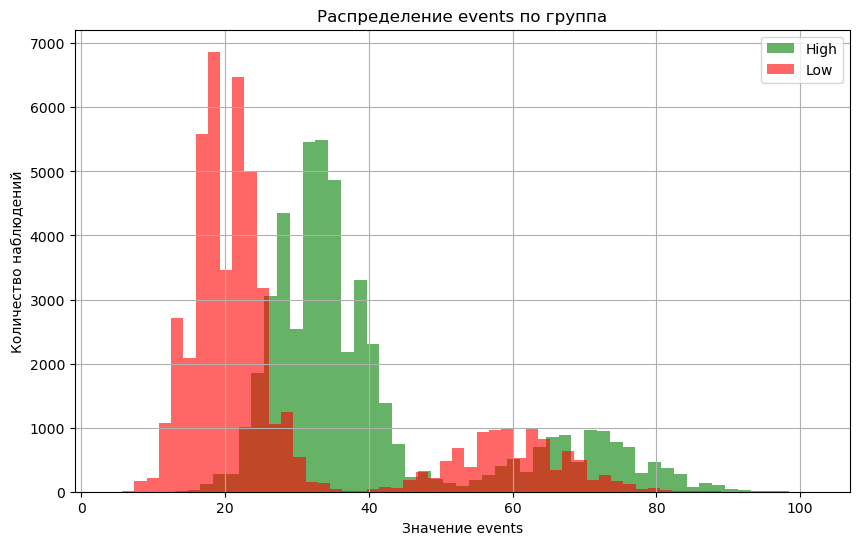

In [173]:
plt.figure(figsize=(10, 6))
plt.hist(test_group, bins=50, alpha=0.6, label='High', color='green')
plt.hist(control_group, bins=50, alpha=0.6, label='Low', color='red')
plt.title('Распределение events по группа')
plt.xlabel('Значение events')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.grid(True)
plt.show()

### Box plots

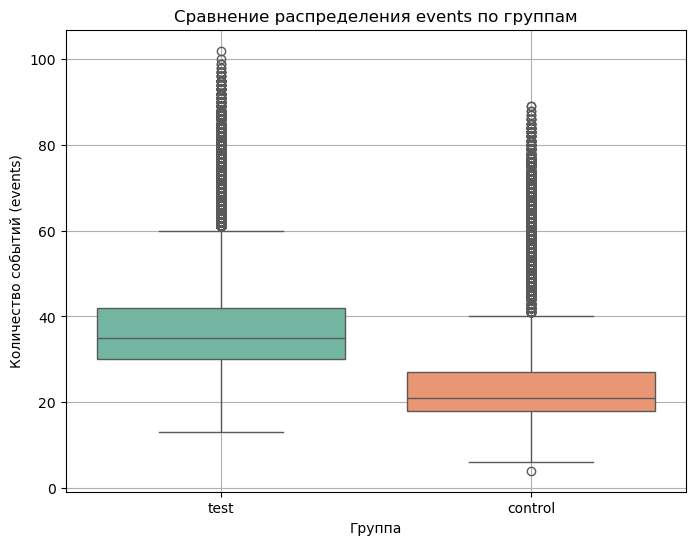

In [178]:
plt.figure(figsize=(8, 6)) # размер 
sns.boxplot(data=df, x='group', y='events', hue='group', palette='Set2', legend=False)

plt.title('Сравнение распределения events по группам')
plt.xlabel('Группа')
plt.ylabel('Количество событий (events)')
plt.grid(True) #  включает сетку
plt.show() #Показывает окно с графиком


### P - value

In [198]:
sts_t, pvalue_t = stats.shapiro(test_group)
sts_c, pvalue_c = stats.shapiro(control_group)

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


In [183]:
pvalue_t

1.2434239803071742e-113

In [185]:
if pvalue_t > 0.05:
    print('Нет оснований отвергать нулевую гипотезу')
else:
    print('Нулевая гипотеза отвергается')


Нулевая гипотеза отвергается


In [187]:
pvalue_c

4.511764307942441e-122

In [189]:
if pvalue_c > 0.005:
    print('Нет оснований отвергать нулевую гипотезу')
else:
    print('Нулевая гипотеза отвергается')
    

Нулевая гипотеза отвергается


In [191]:
pvalue_t

1.2434239803071742e-113

###  График визуальной оценки нормальности распределения.

In [207]:
print(f' Мода тестовый группы; {stats.mode(test_group)}')
print(f' Мода тестовый группы; {stats.mode(control_group)}')

 Мода тестовый группы; ModeResult(mode=33.0, count=2800)
 Мода тестовый группы; ModeResult(mode=19.0, count=3593)


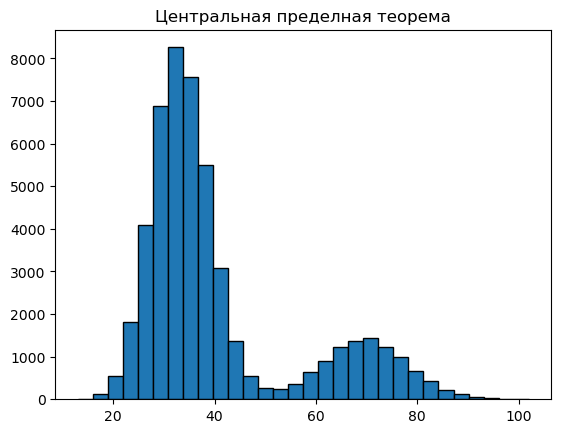

In [209]:
plt.hist(test_group, bins=30, edgecolor='k')
plt.title('Центральная пределная теорема')
plt.show()

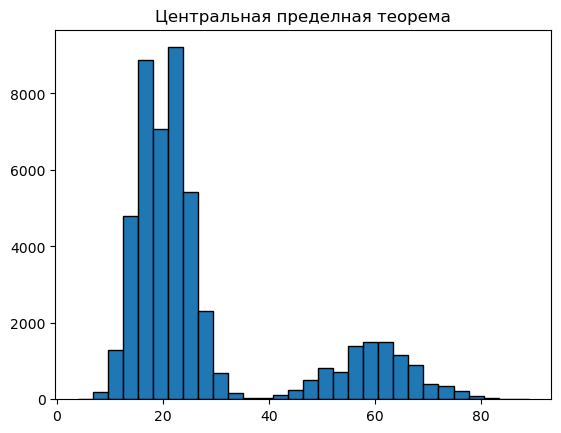

In [211]:
plt.hist(control_group, bins=30, edgecolor='k')
plt.title('Центральная пределная теорема')
plt.show()

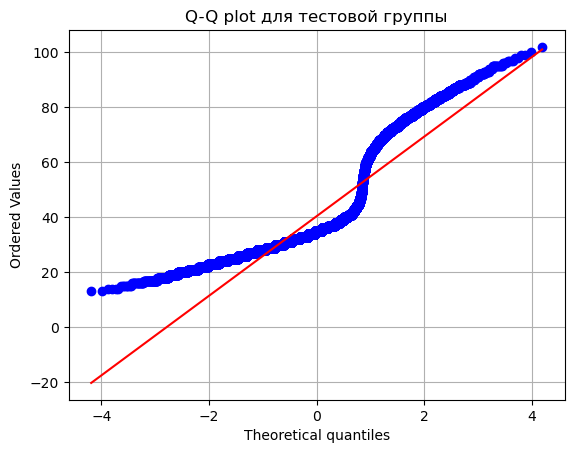

In [213]:
stats.probplot(test_group, dist="norm", plot=plt)
plt.title("Q-Q plot для тестовой группы")
plt.grid(True)
plt.show()